# Lab 3: MLR with Boston Data (Python3)

In the computational section of this Lab you will consider the Boston housing dataset
found in the file boston.csv. This dataset records the median house value and several
other variables for 506 neighborhoods around Boston in 1978. Specifically, the dataset
contains observations from the following variables:

* crim: per capita crime rate
* zn: proportion of residential land zoned for lots over 25,000 sq. ft.
* indus: proportion of non-retail business acreage
* chas: dummy variable indicating whether the neighborhood is adjacent to the Charles River (1) or not (0)
* nox: nitrogen oxide pollution concentration (parts per 10 million)
* rm: average number of rooms per house
* age: proportion of owner-occupied houses built prior to 1940
* dis: weighted mean of distance to five Boston employment centers
* rad: index of accessibility to radial highways
* tax: property tax rate per 10,000 dollars
* ptratio: pupil-teacher ratio
* lstat: percent of population that have a “low” socioeconomic status
* medv: median value of owner-occupied houses in $1000s

Interest lies in understanding which factors influence the value of a house – and how they
influence the value of a house. Interest also lies in predicting the value of a house in a
neighborhood with specific traits. Your job in this Lab is to investigate these questions by
completing each of the tasks below. Where computation is required, you must perform
the calculations in both R and Python.

In [39]:
%matplotlib inline
import os
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std as pi
import numpy as np

data = pd.read_csv('boston.csv')

(a) Fit a multiple linear regression model relating medv to the twelve explanatory variables listed above and calculate and interpret that value of ${𝑅^{2}}$.

In [40]:
mlr_model1 = smf.ols('medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat', data = data).fit()
mlr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          2.23e-133
Time:                        11:13:24   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model explains 73.4% of the variation in median housing prices.

(b) Fit a multiple linear regression model relating medv to all of explanatory variables listed above – except indus – and calculate and interpret that value of ${𝑅^{2}}$.

In [41]:
mlr_model2 = smf.ols('medv ~ crim + zn + chas + nox + rm + age + dis + rad + tax + ptratio + lstat', data = data).fit()
mlr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          2.00e-134
Time:                        11:13:24   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5437      4.920      8.445      0.000      31.878      51.210
crim          -0.1216      0.033     -3.691      0.000      -0.186      -0.057
zn             0.0466      0.014      3.383      0.001       0.020       0.074
chas           2.8591      0.865      3.307      0.001       1.160       4.558
nox          -18.5349      3.708     -4.999      0.000     -25.819     -11.250
rm             3.6500      0.418      8.728      0.000       2.828       4.472
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.5000      0.197     -7.617      0.000      -1.887      -1.113
rad            0.2854      0.064      4.443      0.000       0.159       0.412
tax           -0.0123      0.003     -3.611      0.000      -0.019      -0.006
ptratio       -0.9338      0.131     -7.130      0.000      -1.191      -0.676
lstat         -0.5511      0.050    -10.927      0.000      -0.650      -0.452
==============================================================================
Omnibus:                      171.179   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.910
Skew:                           1.477   Prob(JB):                    4.24e-155
Kurtosis:                       7.999   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model explains 73.4% of the variation in median housing prices.

(c) Fit a multiple linear regression model relating medv to all of explanatory variables listed above – except indus and age – and calculate and interpret that value of ${𝑅^{2}}$.

In [42]:
mlr_model3 = smf.ols('medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + lstat', data = data).fit()
mlr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          1.73e-135
Time:                        11:13:25   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.000      31.818      51.086
crim          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
zn             0.0462      0.014      3.378      0.001       0.019       0.073
chas           2.8719      0.863      3.329      0.001       1.177       4.567
nox          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
rm             3.6730      0.409      8.978      0.000       2.869       4.477
dis           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
rad            0.2839      0.064      4.440      0.000       0.158       0.410
tax           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
ptratio       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
lstat         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model explains 73.4% of the variation in median housing prices.

(d) By commenting on ${𝑅^{2}}$ values and relevant p-values, comment on whether the proportion of industrial land in a neighborhood and the neighborhood’s age significantly influence the median value of a house in that neighborhood.

In the model from part (a), we can see that the indus and age both have large p=values indicating that they are significant. Therefore, ${𝛽_{3}}$ = ${𝛽_{7}}$ = 0. The models from part (b) and (c), we notice that the ${𝑅^{2}}$ value does NOT change when removing indus or both indus and age showing these variables do NOT explain the variation in median housing prices. This is 

(e) Use the additional sum of squares principle to formally test

${H_{0}}$: ${𝛽_{3}}$ = ${𝛽_{7}}$ = 0 vs. ${H_{A}}$: ${𝛽_{j}}$ ≠ 0

for 𝑗 = 3, 7, and draw a conclusion, at a 5% level of significance, regarding
whether indus and age significantly influence medv.

In [43]:
SSEfull = mlr_model1.ssr
SSEreduced = mlr_model3.ssr
l = 2
n = data.shape[0]
p = data.shape[1]-1
F0 = ((SSEreduced - SSEfull)/l) / (SSEfull / (n-p-1))
pval = 1 - stats.f.cdf(F0, dfn = l, dfd = n-p-1)

print("p-value =", pval)
print("F0 =", F0)

p-value = 0.9416664089606118
F0 = 0.060111525951277806


The test statistic, ${F_{0}}$ = 0.06011, compares the error sum of squares between the full and reduced model. The p-value for this test, P(${F_{2493}}$≥0.06011) = 0.94166, is big. Therefore, we do NOT reject the null hypothesis. In conclusion, indus and age do NOT significantly influence medv since ${𝛽_{3}}$ = ${𝛽_{7}}$ = 0  is true.

(f) In the context of the reduced model (i.e., without indus and age), interpret each of the regression coefficients.

In [44]:
mlr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 17 Oct 2018   Prob (F-statistic):          1.73e-135
Time:                        11:13:27   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.000      31.818      51.086
crim          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
zn             0.0462      0.014      3.378      0.001       0.019       0.073
chas           2.8719      0.863      3.329      0.001       1.177       4.567
nox          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
rm             3.6730      0.409      8.978      0.000       2.869       4.477
dis           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
rad            0.2839      0.064      4.440      0.000       0.158       0.410
tax           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
ptratio       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
lstat         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\hat{𝛽_{0}}$ = 41.4517 => The expected median house price in a neighborhood where all of the explanatory variables are equal to 0 is $41,451.75

$\hat{𝛽_{1}}$ = -0.1217 => For a unit increase in crime rate, the median house price is expected is expected to DECREASE by $121.67

$\hat{𝛽_{2}}$ = 0.0462 => For a unit increase in the proportion of residential land zoned for lots over 25,000 sq. ft., the median house price is expected to INCREASE by $46.19 

$\hat{𝛽_{3}}$ = 2.8719 => For a unit increase in the proportion of residential land zoned for lots over 25,000 sq. ft., the median house price of houses on the Charles river is expected to INCREASE by $2,871.87

$\hat{𝛽_{4}}$ = -18.2624 => For a unit increase in nitrogen oxide levels, the median house price is expected to DECREASE by $18,262.43

$\hat{𝛽_{5}}$ = 3.6730 => For every additional room in the house, the median house price is expected to INCREASE by $3,672.96

$\hat{𝛽_{6}}$ = -1.5160 => For a unit increase in the weighted mean of distance to 5 Boston employment centers, the median house price is expected to DECREASE by $1,515.95

$\hat{𝛽_{7}}$ = 0.2839 => For a unit increase in the index of accessibility to Boston's radial highways, the median house price is expected to INCREASE by $283.93

$\hat{𝛽_{8}}$ = -0.0123 i=> For \$10,000 increase in property taxes, the median house price is expected to DECREASE by $12.29

$\hat{𝛽_{9}}$ = -0.9310 => For a unit increase in the pupil-teacher ratio, the median house price is expected to DECREASE by $930.96

$\hat{𝛽_{10}}$ = -0.5465 => For a unit increase in the percent of the population that have a "low" socioeconomic status, the median house price is expected to DECREASE by $546.51

(g) In the context of the reduced model (i.e., without indus and age), provide a point prediction (and a 95% prediction interval) for the median house value in a neighborhood for which
* crim = 5
* zn = 10
* chas = 1
* nox = 0.6
* rm = 3
* dis = 4
* rad = 10
* tax = 500
* ptratio = 15
* lstat = 10


In [45]:
prediction = mlr_model3.predict(exog = dict(crim=[5], zn=[10], chas=[1], nox=[0.6], rm=[3], dis=[4], rad=[10], tax=[500], ptratio=[15], lstat=[10]))
ignore, lwr, upr = pi(mlr_model3, exog = [1, 5, 10, 1, 0.6, 3, 4, 10, 500, 15, 10], alpha = 0.05)
print("Prediction:", prediction[0])
print("Lower 95% Prediction Limit:", lwr[0])
print("Upper 95% Prediction Limit:", upr[0])

Prediction: 15.43887911936219
Lower 95% Prediction Limit: 5.417009555895882
Upper 95% Prediction Limit: 25.460748682828495


The median house value in such a neighborhood is predicted to be \$15,438.88 dollars, with lower 95%  prediction limit of \$5,417.01 and upper 95%  prediction limit of \$25,460.75

(h) In the context of the reduced model (i.e., without indus and age), construct the
following four plots

i. Studentized Residuals vs. Index

ii. Studentized Residuals vs. Fitted Values

iii. Histogram of Studentized Residuals

iv. QQ-Plot of Studentized Residuals

Using these plots decide whether the residuals appear to be independent, normally
distributed and have constant variance.

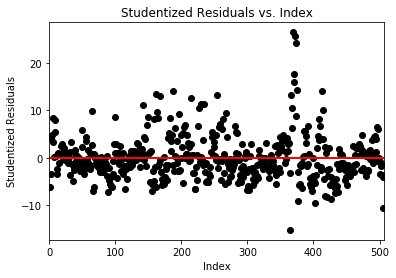

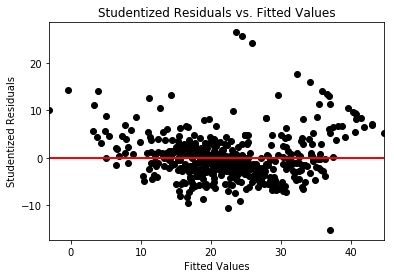

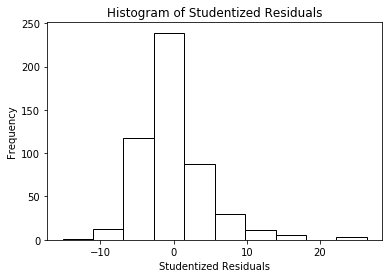

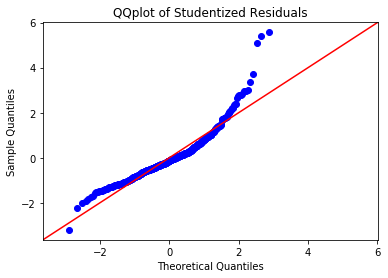

In [46]:
#Studentized Residuals vs. Index
n = len(mlr_model3.resid)
index = np.linspace(1,n,n)
plt.figure()
plt.scatter(x = index, y = mlr_model3.resid, color = "black")
plt.title("Studentized Residuals vs. Index")
plt.xlabel("Index")
plt.ylabel("Studentized Residuals")
plt.hlines(y = 0, xmin = 0, xmax = n+1, color = "red", linewidth = 2)
plt.xlim(0,n+1)

#Studentized Residuals vs. Fitted Values
plt.figure()
plt.scatter(x = mlr_model3.fittedvalues, y = mlr_model3.resid, color = "black")
plt.title("Studentized Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals")
plt.hlines(y = 0, xmin = np.min(mlr_model3.fittedvalues), xmax = np.max(mlr_model3.fittedvalues), color = "red", linewidth = 2)
plt.xlim(np.min(mlr_model3.fittedvalues), np.max(mlr_model3.fittedvalues))

#Histogram
plt.figure()
plt.hist(mlr_model3.resid, edgecolor='black', color = "white")
plt.title("Histogram of Studentized Residuals")
plt.xlabel("Studentized Residuals")
plt.ylabel("Frequency")

#QQplot
sm.qqplot(mlr_model3.resid, stats.norm, fit = True, line = '45')
plt.title("QQplot of Studentized Residuals")

Studentized Residuals vs. Index plot: There are no patterns or non-randomness that show that the residuals are independent of one another.

Studentized Residuals vs. Fitted Values plot: As the fitted values increase, there is a small increase in variation showing that the residuals do NOT have a constant variance.

Histogram & QQ-plot: Plots show that the residuals are right-skewed. Therefore, they are NOT normally distributed.

(i) Suppose that any one of the residual assumptions is not satisfied. Indicate, from
the list below, which inferences would no longer be valid.
* Parameter estimates (i.e., $\hat{𝛽_{0}}$, $\hat{𝛽_{1}}$,…, $\hat{𝛽_{p}}$ and $\hat{𝜎_{1}}$).
* Hypothesis tests (i.e., ${H_{0}}$: ${𝛽_{j}}$ = 0 vs. ${H_{A}}$: ${𝛽_{j}}$ ≠ 0).
* Confidence intervals (i.e., for ${𝛽_{0}}$,${𝛽_{1}}$,…,${𝛽_{p}}$ or ${𝜇_{0}}$).
* Prediction intervals for ${y_{0}}$.

If error assumptions are invalid this would impact all but the validity of the parameter estimates since they are derived from the LSEstimates so no distibutional assumptions are being made unlike the others (hypothesis tests, CI and PI).